<a href="https://colab.research.google.com/github/shivamkrishna1000/Medical-Insurance-Cost-Prediction/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Medical Insurance Cost Prediction

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [57]:
medical=pd.read_csv('/content/insurance.csv')

In [58]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
medical.shape

(1338, 7)

In [60]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Sex Distribution')

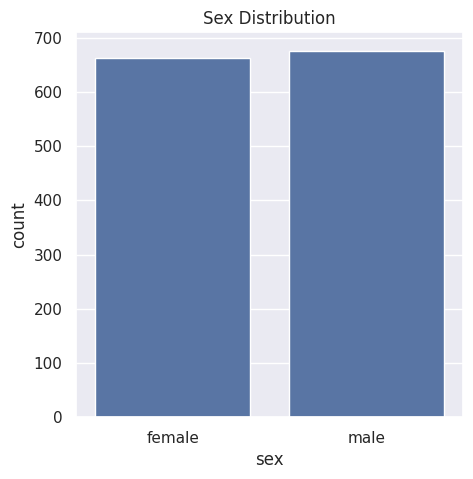

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=medical)
plt.title('Sex Distribution')

In [63]:
medical.value_counts('sex')

sex
male      676
female    662
Name: count, dtype: int64

In [64]:
medical.value_counts('smoker')

smoker
no     1064
yes     274
Name: count, dtype: int64

In [65]:
medical.value_counts('region')

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

In [66]:
medical.replace({'sex':{'male':0,'female':1}},inplace=True)
medical.replace({'smoker':{'no':0,'yes':1}},inplace=True)
medical=medical.replace({'region':{'southeast':0,'northwest':1,'southwest':2,'northeast':3}})

In [67]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


<ipython-input-50-c7d50380e518>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical.age)


Text(0.5, 1.0, 'Age Distribution')

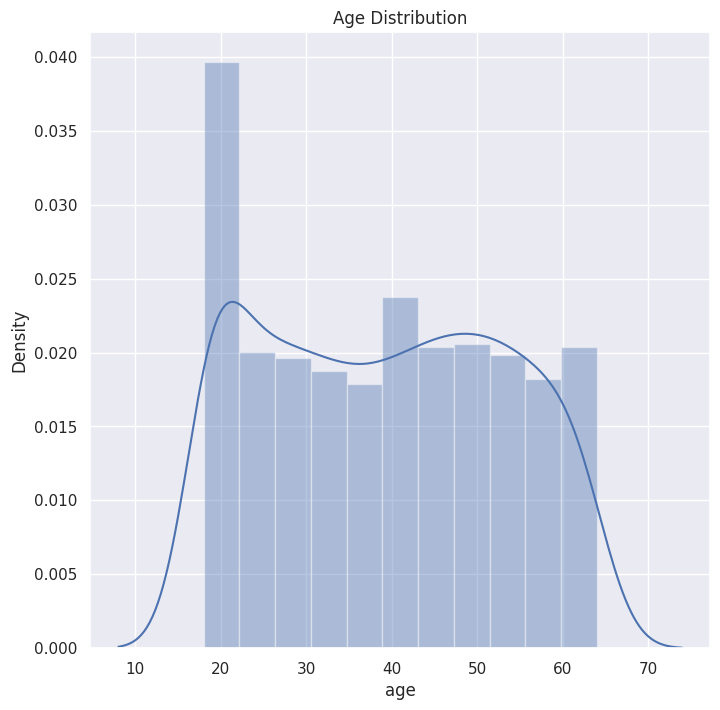

In [50]:
plt.figure(figsize=(8,8))
sns.distplot(medical.age)
plt.title('Age Distribution')

<ipython-input-51-8ef4ad226e37>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical.bmi)


Text(0.5, 1.0, 'Age Distribution')

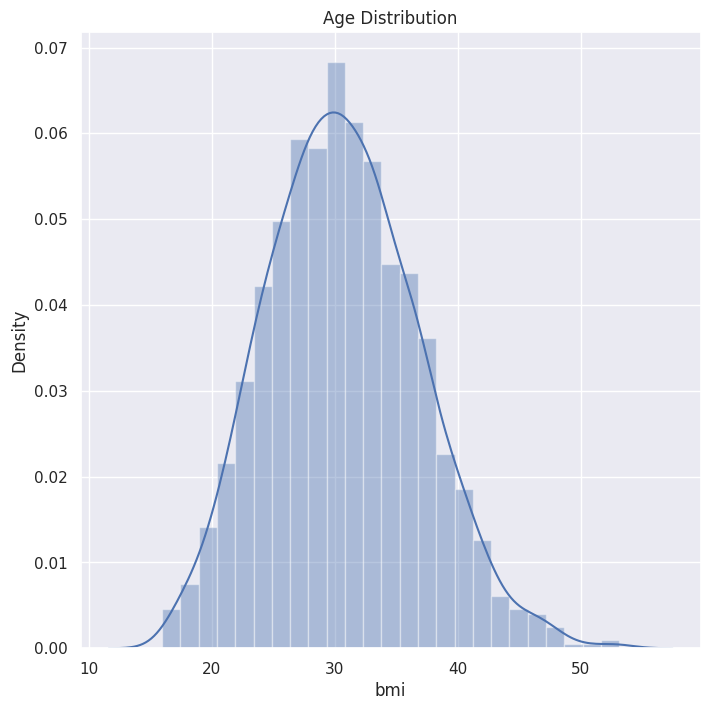

In [51]:
plt.figure(figsize=(8,8))
sns.distplot(medical.bmi)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Sex Distribution')

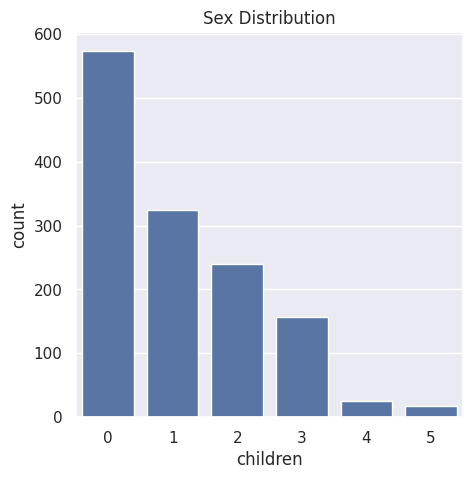

In [52]:
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=medical)
plt.title('Sex Distribution')

In [85]:
x=medical.drop('charges',axis=1)
y=medical.charges

In [86]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       2
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       1
4      32    0  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       1
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       2
1337   61    1  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [97]:
scaler=StandardScaler()

In [98]:
scaler.fit(x)

StandardScaler()

In [99]:
x=scaler.transform(x)

In [100]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [101]:
model=LinearRegression()

In [102]:
model.fit(xtrain,ytrain)

LinearRegression()

In [103]:
trainpredict=model.predict(xtrain)
score_1=metrics.r2_score(ytrain,trainpredict)
print(score_1)

0.7471966569268875


In [104]:
testpredict=model.predict(xtest)
score_2=metrics.r2_score(ytest,testpredict)
print(score_2)

0.7611786615107553


In [105]:
input=(31,1,25.74,0,0,0)
arr=np.asarray(input)
rearr=arr.reshape(1,-1)
re=scaler.transform(rearr)
predict=model.predict(re)
print(predict)

[4023.35379071]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
